<a href="https://colab.research.google.com/github/wakii/ML_Programming/blob/master/ex3-sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/data/ex3'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [5]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.7671,  1.0000],
        [ 0.4527,  1.0000],
        [-0.4785,  1.0000],
        [-0.4036,  1.0000],
        [ 0.2211,  1.0000]])

- tensor(array)를 생성하는 statement
- tensor의 값들을 바꾸는 코드
- row5 까지 조회하는 코드



- `y = a_1*x_1 + a_2*x_2`에서
  - x = [x_1, x_2]를 의미
  - x_2는 1로 고정되어 있는 상태
- `x = torch.ones(n,2)`
  - say pyTorch to create a tensor of 'n x 2'
  - n rows, and 2 columns. => rank(x) = 2
  - 모든 componenet들이 1을 의미
- `x[:,0]` 
  - ':' : for every single row
  - x[:,0] :  for every single row, take the column 0 
  - uniform_ : replace all the values with unifor random number between -1 and 1.
    - '_' : don't return to me but replace the original value





In [6]:
a = tensor(3.,2); a

tensor([3., 2.])

- coefficient(3.,2) 생성 
  - a1 := 3, a2:= 2
  - slope :=3, intercept :=2 를 의미
- parameter(coefficent)를 감싸는 tensor는 deeplearning에서 array를 의미한다.(단, 직사각형 또는 정사각형과 같은 방식, 기존 code에서처럼 `[[3],[1,2,4],[1,2]]`처럼 element들의 특성이 서로 다르지 않다.)
- ex) image는 3-dimensional tensor이다.
  - row, columns, channel을 가진 3 matrix(r,g,b)
- deeplearning에서는 기존 선형대수학에서처럼 'dimension'이라는 단어보다는 'rank' 또는 'axes'를 사용한다.
  - ex) image는 rank3 tensor
- 




In [0]:
y = x@a + torch.rand(n)

- matrix operation

- `x@a` in python 은 matrix product를 의미한다. (X matrix의 값에 a vector를 곱하는 것)




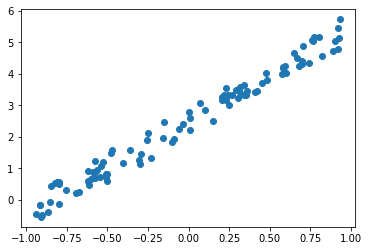

In [8]:
plt.scatter(x[:,0], y);

- matplotlib의 plot
- x 축 : x의 모든 row의 첫번째 column값(-1,1)
- y 축 : x값에 parameter a를 적용해 matrix operation 해서 나온 값.


You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

- loss function 으로 mean squared error function을 이용
  - 실제 data 값(x,y)와 회귀선(x, y_hat)의 error 값을 계산해, 가장 작은 값을 구함.
- `y_hat`, `y` : rank 1 tensor(rank 1 vector)
- `(y_hat-y)**2.mean()` : mean squared error


Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [12]:
a.type()

'torch.FloatTensor'

- 숫자 쓸 때는 float으로 쓰기


In [11]:
y_hat = x@a
mse(y_hat, y)

tensor(7.1880)

- tensor(7.1880) : loss

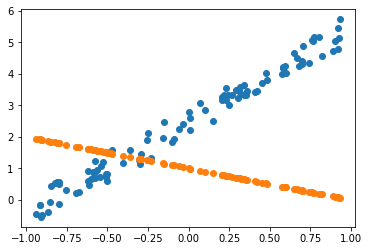

In [13]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

- 주황색 line : tensor(-1.,1)로 계산한 y_hat과 x의 그래프
- 파랑색 line : 실제 값들의 line

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

- gradient는 도함수.

In [14]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

- 매번 update 함수를 돌릴 때 마다,
  - a값에 따라 y_hat을 matrix opration으로 계산해주고,
  - 그 y_hat과 실제 y 사이의 error를 mse로 계산해준다. -> loss
  - 중간 중간 loss 값을 print 하고,
  - `loss.backward()` : gradient를 계산해준다.
    -  pyTorch는 매번의 mse 값을 계산하고, 이를 tracking한다.
  - `a.sub_(lr * a.grad)` : a의 값을 조정한다.
    - 설정한 learning rate * 현재 a. grad 값을 a에서 빼주고, 그 결과를 a에 저장해준다.
      - 이때, 부호가 어떻든, subtract로 인해 조정된다.

In [16]:
lr = 1e-1
for t in range(100): update()

tensor(7.1880, grad_fn=<MeanBackward0>)
tensor(1.4142, grad_fn=<MeanBackward0>)
tensor(0.4006, grad_fn=<MeanBackward0>)
tensor(0.1515, grad_fn=<MeanBackward0>)
tensor(0.0891, grad_fn=<MeanBackward0>)
tensor(0.0735, grad_fn=<MeanBackward0>)
tensor(0.0695, grad_fn=<MeanBackward0>)
tensor(0.0686, grad_fn=<MeanBackward0>)
tensor(0.0683, grad_fn=<MeanBackward0>)
tensor(0.0683, grad_fn=<MeanBackward0>)


- 100번 update 한다.

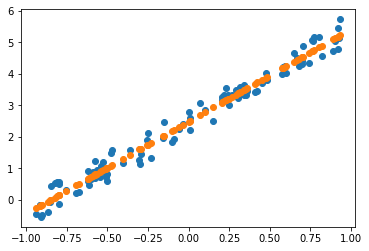

In [17]:
plt.scatter(x[:,0],y)
with torch.no_grad():
    plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
with torch.no_grad():
    line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    with torch.no_grad():
        line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

- 위 경우에서는 모든 data(x, len(x)== 100))을 한번에 다루지만,
- imagenet data등을 다룰 때는 그 많은 Data들을 한번에 다룰 수 없다.
- 따라서 batch 만큼의 data를 매번 randomly 뽑아, gradient descent를 계산하고, weight를 update하는 것을 반복한다.


## Vocab


- Learning rate
  - 매번 weight(parameter, coefficent)를 계산하기 위해 gradient를 곱하는 비율
- Epoch
  - data를 한 번 다 도는 것
    - 위 사례에서는 loop 한 번 돌 때마다 모든 data를 다 다뤘지만,
    - 실제로는 한번의 epoch(loop)마다, batch size만큼 뽑아서 계속 돌린다.
    - 너무 많이 하면, overfitting된다.
- Minibatch
  - random batch points to update weights
- SGD
  - stoachastic gradient descent using minibatches
- Model / Architecture
  - parameter를 찾는(fitting)하는 mathematical function
  - ex) y = x@a
- Parameters
  - === coefficents, weights
- Loss function
  - 설정한 weight 값으로 계산된 추정치와 실제 값과의 차이를 계산하는 function
  - ex) MSE

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.